## Importing The Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Display Rows and Columns Clearly without skipping

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### <b> Loading the Dataset

In [3]:
df = pd.read_csv("HR-Employee-Attrition.csv")
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes      Travel_Rarely       1102                   Sales                 1          2  Life Sciences              1               1                        2  Female          94               3         2        Sales Executive                4        Single           5993        19479                   8      Y      Yes                 11                  3                         1             80                 0                  8                      0                1               6                   4                        0                     5
1   49        No  Travel_Frequently        279  Research & Development                 8          1  Life Sciences              1               2                        3    Male          61               2         2     Research Scientist                2       Married           5130        24907                   1      Y       No                 23                  4                         4             80                 1                 10                      3                3              10                   7                        1                     7
2   37       Yes      Travel_Rarely       1373  Research & Development                 2          2          Other              1               4                        4    Male          92               2         1  Laboratory Technician                3        Single           2090         2396                   6      Y      Yes                 15                  3                         2             80                 0                  7                      3                3               0                   0                        0                     0
3   33        No  Travel_Frequently       1392  Research & Development                 3          4  Life Sciences              1               5                        4  Female          56               3         1     Research Scientist                3       Married           2909        23159                   1      Y      Yes                 11                  3                         3             80                 0                  8                      3                3               8                   7                        3                     0
4   27        No      Travel_Rarely        591  Research & Development                 2          1        Medical              1               7                        1    Male          40               3         1  Laboratory Technician                2       Married           3468        16632                   9      Y       No                 12                  3                         4             80                 1                  6                      3                3               2                   2                        2                     2

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
df.shape

(1470, 35)

In [6]:
df.duplicated().sum()

0

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype='object')

<span style="color:#88cc88; font-family:'Comic Sans MS'; font-weight:bold; font-size:72px;">Exploratory Data Analysis</span>

In [8]:
attrition_counts = df[['Attrition']].value_counts().reset_index()
attrition_counts.columns = ['Attrition', 'Count']

attrition_counts 

Attrition  Count
0        No   1233
1       Yes    237

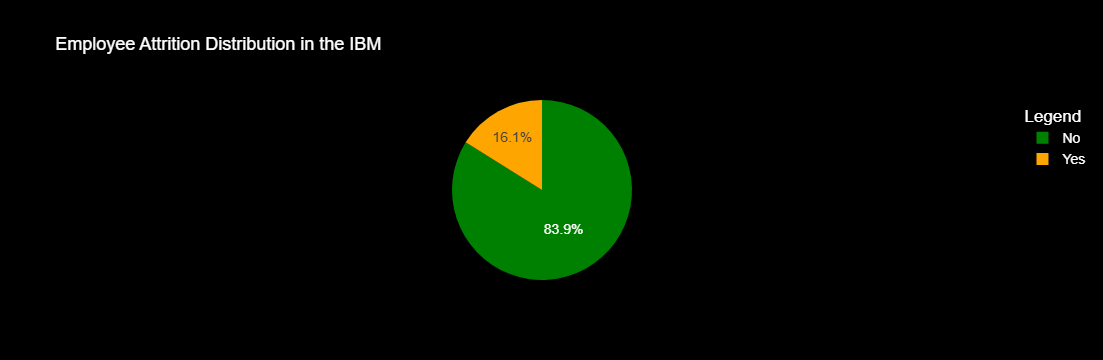

In [9]:
# Plotting the pie chart using Plotly Express 
fig = px.pie(attrition_counts, 
             names='Attrition', 
             values='Count', 
             title='Employee Attrition Distribution in the IBM',
             color='Attrition',
             color_discrete_map={'No': 'green', 'Yes': 'orange'})  # Green for No, Orange for Yes

# layout for a sleek look with a black background
fig.update_layout(
    legend_title_text='Legend',
    paper_bgcolor='black',
    plot_bgcolor='black',
    font=dict(family="Arial", size=14, color="white"),  # White font for better readability
    title_font=dict(family="Arial", size=18, color="white"),  # White title font
)

fig.show()


## INFERENCE : 
**From the above Pie Chart, we can infer that out of 1470 employees, 16% of the employees left their job due to some reasons whereas other 84% of the employees preferred to continue their job at the company** 

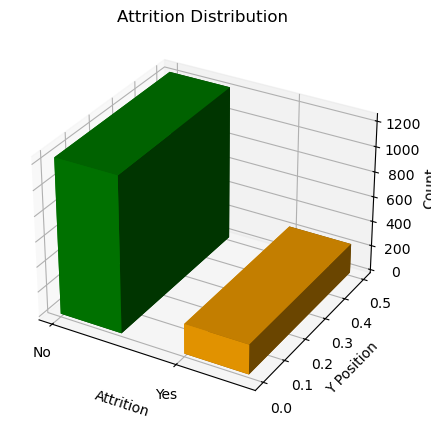

In [10]:

# Data from Attrition value counts
# categories = ['No', 'Yes']
# values = [1233, 237]

categories = attrition_counts['Attrition'] 
values = attrition_counts['Count']

# Creating the figure and 3D axis
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111, projection='3d')

# X and Y positions for the bars
xpos = np.arange(len(categories))
ypos = np.zeros(len(categories))
zpos = np.zeros(len(categories))

# Width, depth, and height of the bars
dx = dy = 0.5
dz = values

# Plotting the bars
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=['green', 'orange'])

# Adding labels
ax.set_xlabel('Attrition')
ax.set_ylabel('Y Position')
ax.set_zlabel('Count')
ax.set_title('Attrition Distribution')

# Setting the ticks and labels
ax.set_xticks(xpos)
ax.set_xticklabels(categories)

# Show the plot
plt.show()


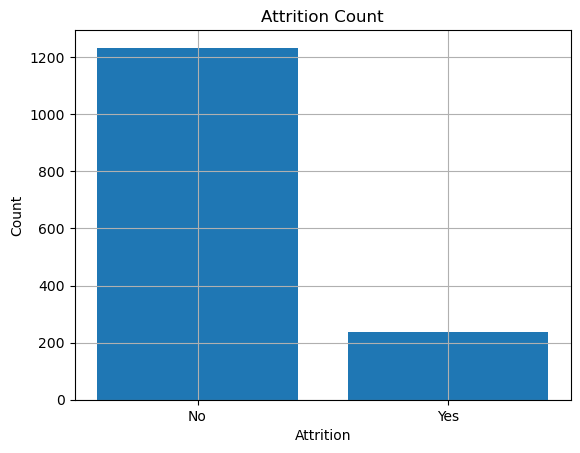

In [11]:
# Plotting the bar graph
plt.bar(attrition_counts['Attrition'], attrition_counts['Count'])
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Count')
plt.grid(True)
plt.show()


In [12]:
age = df['Age'].value_counts()
age

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

In [13]:
age_counts = df['Age'].value_counts().reset_index()
age_counts.columns = ['Age', 'Count']

age_counts 

Age  Count
0    35     78
1    34     77
2    36     69
3    31     69
4    29     68
5    32     61
6    30     60
7    33     58
8    38     58
9    40     57
10   37     50
11   27     48
12   28     48
13   42     46
14   39     42
15   45     41
16   41     40
17   26     39
18   44     33
19   46     33
20   43     32
21   50     30
22   25     26
23   24     26
24   49     24
25   47     24
26   55     22
27   51     19
28   53     19
29   48     19
30   54     18
31   52     18
32   22     16
33   56     14
34   23     14
35   58     14
36   21     13
37   20     11
38   59     10
39   19      9
40   18      8
41   60      5
42   57      4

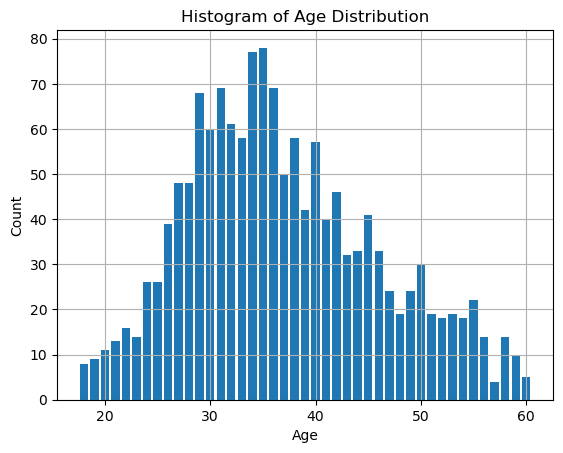

In [14]:
# Plotting the histogram
plt.bar(age_counts['Age'], age_counts['Count'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age Distribution')
plt.grid(True)
plt.show()


In [15]:
df['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

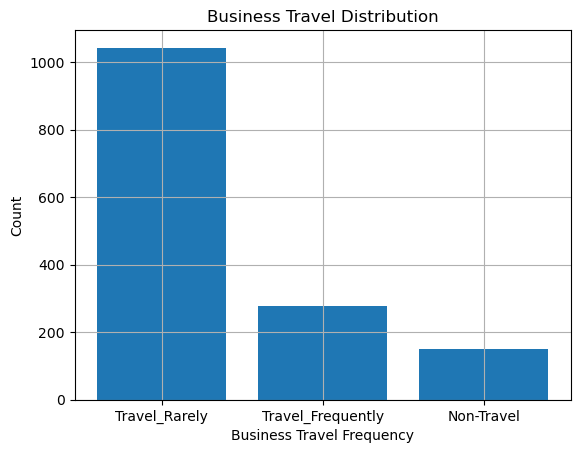

In [16]:
#Assuming you have your DataFrame 'df'
business_travel_counts = df['BusinessTravel'].value_counts().reset_index()
business_travel_counts.columns = ['BusinessTravel', 'Count']

# Plotting the bar graph
plt.bar(business_travel_counts['BusinessTravel'], business_travel_counts['Count'])
plt.xlabel('Business Travel Frequency')
plt.ylabel('Count')
plt.title('Business Travel Distribution')
plt.grid(True)
plt.show()


In [17]:
df['DailyRate'].value_counts().head()

DailyRate
691     6
408     5
530     5
1329    5
1082    5
Name: count, dtype: int64

In [18]:
df['Department'].value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

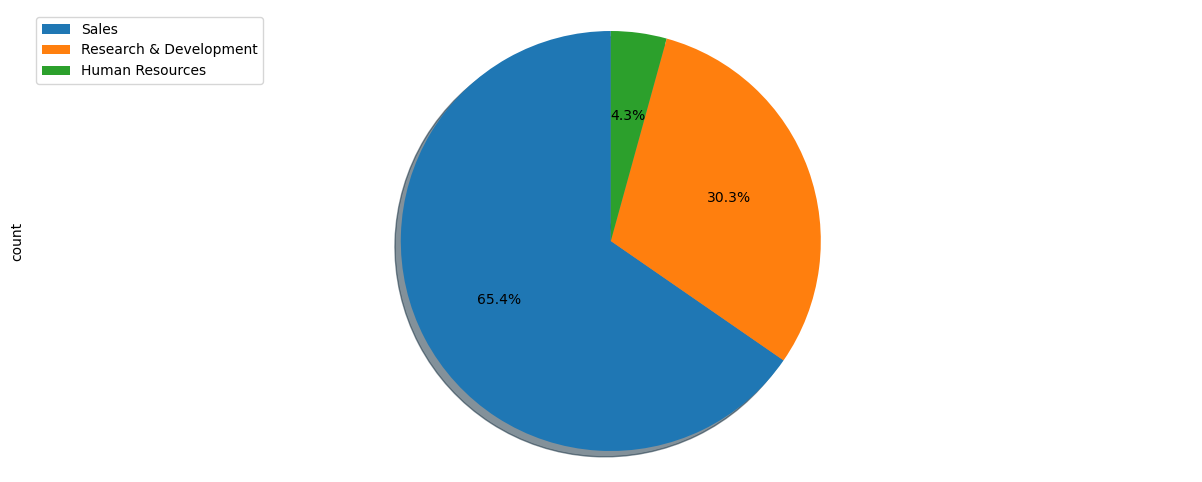

In [19]:
df['Department'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=df['Department'].unique(), loc='upper left') 
plt.show()

In [20]:
df['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

In [21]:
df['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

In [22]:
df['EnvironmentSatisfaction'].value_counts()

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [23]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [24]:
df['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [25]:
df['JobLevel'].value_counts()

JobLevel
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [26]:
df['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

In [27]:
df['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [28]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64

In [29]:
df['NumCompaniesWorked'].value_counts()

NumCompaniesWorked
1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: count, dtype: int64

In [30]:
df['PercentSalaryHike'].value_counts()

PercentSalaryHike
11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: count, dtype: int64

In [31]:
df['PerformanceRating'].value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [32]:
df['RelationshipSatisfaction'].value_counts()

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [33]:
df['StockOptionLevel'].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [34]:
df_counts = df['TotalWorkingYears'].value_counts().reset_index()
df_counts.columns = ['TotalWorkingYears', 'Count']

df_counts 

TotalWorkingYears  Count
0                  10    202
1                   6    125
2                   8    103
3                   9     96
4                   5     88
5                   7     81
6                   1     81
7                   4     63
8                  12     48
9                   3     42
10                 15     40
11                 16     37
12                 11     36
13                 13     36
14                 21     34
15                 17     33
16                  2     31
17                 14     31
18                 20     30
19                 18     27
20                 19     22
21                 23     22
22                 22     21
23                 24     18
24                 25     14
25                 28     14
26                 26     14
27                  0     11
28                 29     10
29                 31      9
30                 32      9
31                 30      7
32                 33      7
33                 27      7
34                 36      6
35                 34      5
36                 37      4
37                 35      3
38                 40      2
39                 38      1

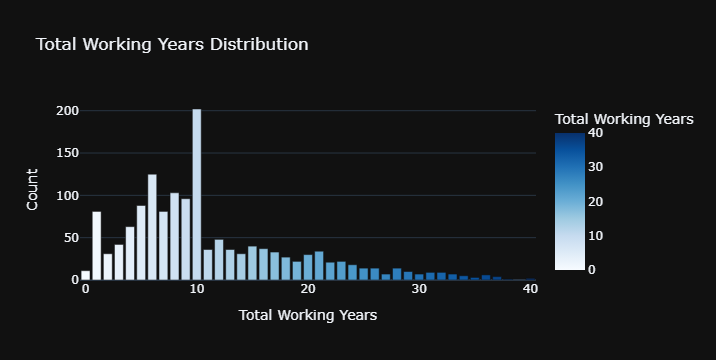

In [35]:
# Plotting the bar chart using Plotly Express
fig = px.bar(df_counts, 
             x='TotalWorkingYears', 
             y='Count', 
             title='Total Working Years Distribution', 
             labels={'TotalWorkingYears': 'Total Working Years', 'Count': 'Count'}, 
             color='TotalWorkingYears',
             color_continuous_scale=px.colors.sequential.Blues) # color scale

#  layout for an elegant look
fig.update_layout(
    legend_title_text='Legend',
    template='plotly_dark'
)

fig.show()


In [36]:
df['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [37]:
years_at_company_counts = df['YearsAtCompany'].value_counts().reset_index()
years_at_company_counts.columns = ['YearsAtCompany', 'Count']
years_at_company_counts

YearsAtCompany  Count
0                5    196
1                1    171
2                3    128
3                2    127
4               10    120
5                4    110
6                7     90
7                9     82
8                8     80
9                6     76
10               0     44
11              11     32
12              20     27
13              13     24
14              15     20
15              14     18
16              22     15
17              12     14
18              21     14
19              18     13
20              16     12
21              19     11
22              17      9
23              24      6
24              33      5
25              25      4
26              26      4
27              31      3
28              32      3
29              27      2
30              36      2
31              29      2
32              23      2
33              37      1
34              40      1
35              34      1
36              30      1

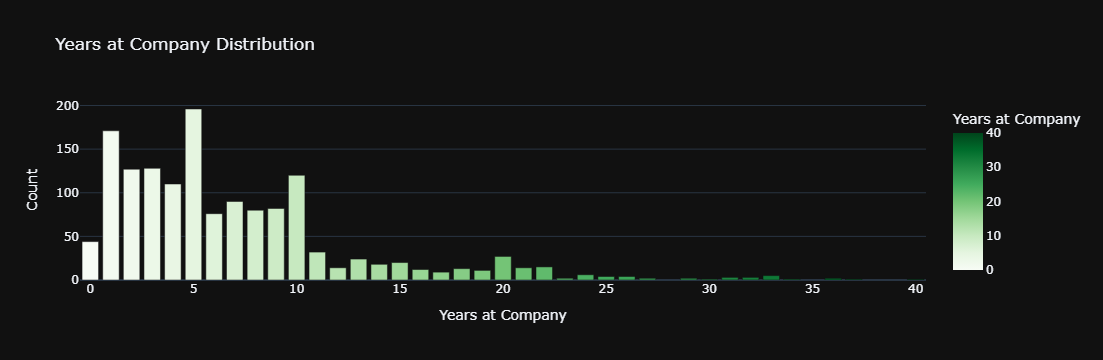

In [38]:
# Plotting the bar chart using Plotly Express
fig = px.bar(years_at_company_counts, 
             x='YearsAtCompany', 
             y='Count', 
             title='Years at Company Distribution', 
             labels={'YearsAtCompany': 'Years at Company', 'Count': 'Count'}, 
             color='YearsAtCompany',
             color_continuous_scale=px.colors.sequential.Greens)  #  a color scale

# layout for an elegant look
fig.update_layout(
    legend_title_text='Legend',
    template='plotly_dark'
)

fig.show()


In [39]:
years_in_current_role_counts = df['YearsInCurrentRole'].value_counts().reset_index()
years_in_current_role_counts.columns = ['YearsInCurrentRole', 'Count']

years_in_current_role_counts

YearsInCurrentRole  Count
0                    2    372
1                    0    244
2                    7    222
3                    3    135
4                    4    104
5                    8     89
6                    9     67
7                    1     57
8                    6     37
9                    5     36
10                  10     29
11                  11     22
12                  13     14
13                  14     11
14                  12     10
15                  15      8
16                  16      7
17                  17      4
18                  18      2

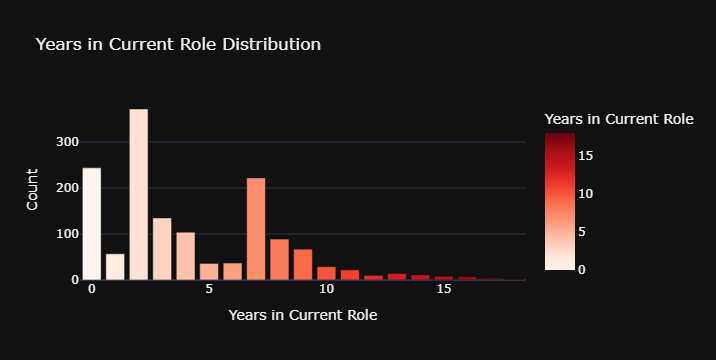

In [40]:
# Plotting the bar chart using Plotly Express
fig = px.bar(years_in_current_role_counts, 
             x='YearsInCurrentRole', 
             y='Count', 
             title='Years in Current Role Distribution', 
             labels={'YearsInCurrentRole': 'Years in Current Role', 'Count': 'Count'}, 
             color='YearsInCurrentRole',
             color_continuous_scale=px.colors.sequential.Reds)  #color scale

# layout for an elegant look
fig.update_layout(
    legend_title_text='Legend',
    template='plotly_dark'
)

fig.show()


<h2> <b> ANALYSIS OF THE FEATURE NAMES</h2> 


# **Droping Useless Features**

1. *StandardHours*
1. *EmployeeCount*
1. *Over18*
1. *EmployeeNumber*
1. *StockOptionLevel*

In [41]:
# StandardHours,EmployeeCount,Over18,EmployeeNumber,StockOptionLevel
df.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'],inplace=True)
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  DistanceFromHome  Education EducationField  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager
0   41       Yes      Travel_Rarely       1102                   Sales                 1          2  Life Sciences                        2  Female          94               3         2        Sales Executive                4        Single           5993        19479                   8      Yes                 11                  3                         1                  8                      0                1               6                   4                        0                     5
1   49        No  Travel_Frequently        279  Research & Development                 8          1  Life Sciences                        3    Male          61               2         2     Research Scientist                2       Married           5130        24907                   1       No                 23                  4                         4                 10                      3                3              10                   7                        1                     7
2   37       Yes      Travel_Rarely       1373  Research & Development                 2          2          Other                        4    Male          92               2         1  Laboratory Technician                3        Single           2090         2396                   6      Yes                 15                  3                         2                  7                      3                3               0                   0                        0                     0
3   33        No  Travel_Frequently       1392  Research & Development                 3          4  Life Sciences                        4  Female          56               3         1     Research Scientist                3       Married           2909        23159                   1      Yes                 11                  3                         3                  8                      3                3               8                   7                        3                     0
4   27        No      Travel_Rarely        591  Research & Development                 2          1        Medical                        1    Male          40               3         1  Laboratory Technician                2       Married           3468        16632                   9       No                 12                  3                         4                  6                      3                3               2                   2                        2                     2

In [42]:
df.shape # Removed 5 feature now 35 - 5 = 30

(1470, 30)

# **Analysis of the Rating Features**
- JobSatisfaction
- EnvironmentSatisfaction
- RelationshipSatisfaction
- JobInvolvement
- WorkLifeBalance
- PerformanceRating

In [43]:
df['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

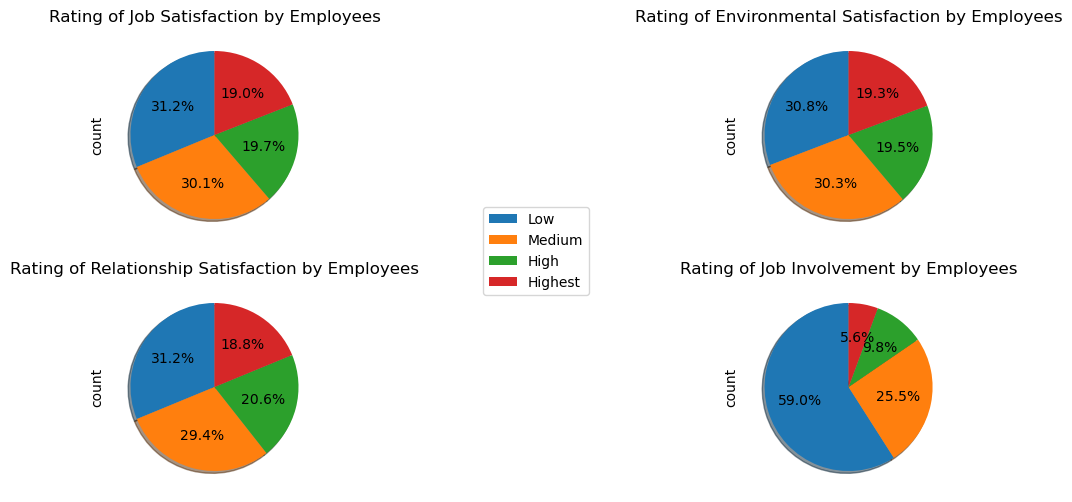

In [44]:
fig = plt.figure() 

ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)  

labels = 'Low','Medium','High','Highest'

df['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

df['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax2) 
ax2.set_title('Rating of Environmental Satisfaction by Employees')

df['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax3)
ax3.set_title('Rating of Relationship Satisfaction by Employees')

df['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax4) 
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

## <B> INFERENCE : 

**From the subplot, we can infer that more than 60% of the employees are :**
- Not Satisfied in their Job
- Not Satisfied with their Work Environmnet
- Not Satisfied in their Relationship
- Not Getting involved in their job

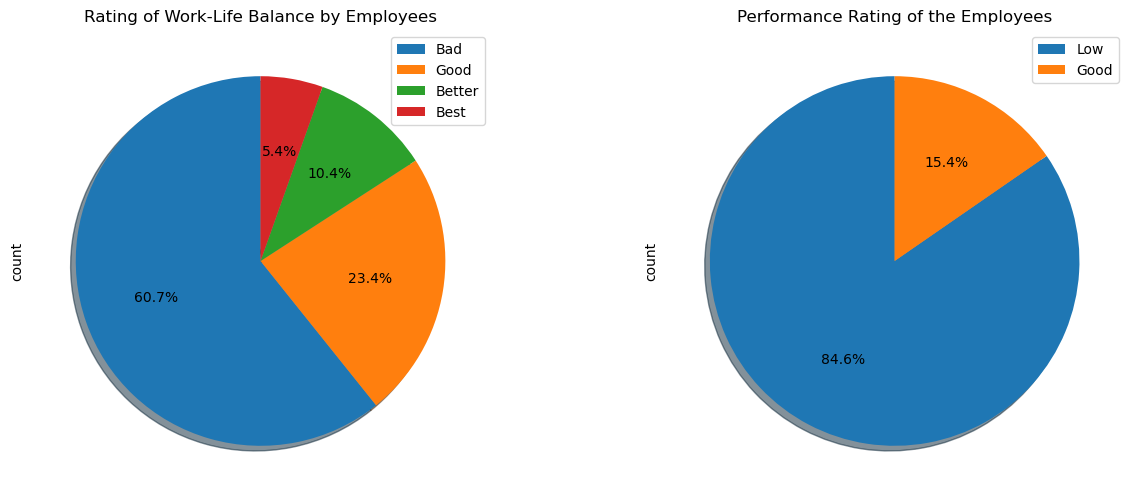

In [45]:
fig2 = plt.figure() 

ax5 = fig2.add_subplot(121) 
ax6 = fig2.add_subplot(122)  
  
labels_list1 = 'Bad','Good','Better','Best' 
labels_list2 = 'Low','Good','Excellent','Outstanding'

df['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax5) # add to subplot 2
ax5.set_title ('Rating of Work-Life Balance by Employees')
ax5.legend(labels=labels_list1,loc='upper right')

df['PerformanceRating'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax6) 
ax6.set_title('Performance Rating of the Employees')
ax6.legend(labels=labels_list2,loc='upper right')

plt.show()

## INFERENCE :

**From the above piecharts, we can see that:**
- Almost 60% of the employees have rated their Work-life Balance as Bad 
- Almost 85% of the employees have a low performance rating 

## <b> Analysis of Business Travel Feature

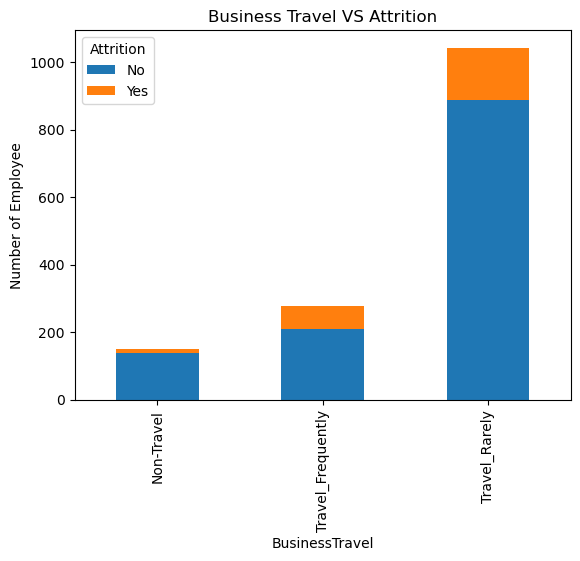

In [46]:
props = df.groupby("BusinessTravel")['Attrition'].value_counts(normalize=False).unstack()

props.plot(kind='bar', alpha=1, stacked='False')

plt.title('Business Travel VS Attrition')
plt.ylabel('Number of Employee')
plt.show()

## <b> INFERENCE :</b>
**From the above data it is clear that Employees who travel rarely have more attrition rate followed by Employees who travel frequently**

## <b> SUGGESTION :</b>
- To address or reduce this issue , conduct regular (preferably monthly) surveys to gauge employee satisfaction and preferences regarding business travel.

- Develop flexible travel policies that take into account the individual preferences and needs of employees.

- Offer alternative roles or responsibilities that require less travel for those who express a preference for reduced travel.

- Implement a mentorship or buddy system for frequent travelers to provide support and share best practices.

- Provide additional support and resources, such as wellness programs, to help frequent travelers manage the stress and challenges associated with frequent travel

## <b>Analysis of Work Experience 

- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager
- TotalWorkingYears

In [47]:
we = df[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]
we.head()

YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  TotalWorkingYears Attrition
0               6                   4                        0                     5                  8       Yes
1              10                   7                        1                     7                 10        No
2               0                   0                        0                     0                  7       Yes
3               8                   7                        3                     0                  8        No
4               2                   2                        2                     2                  6        No

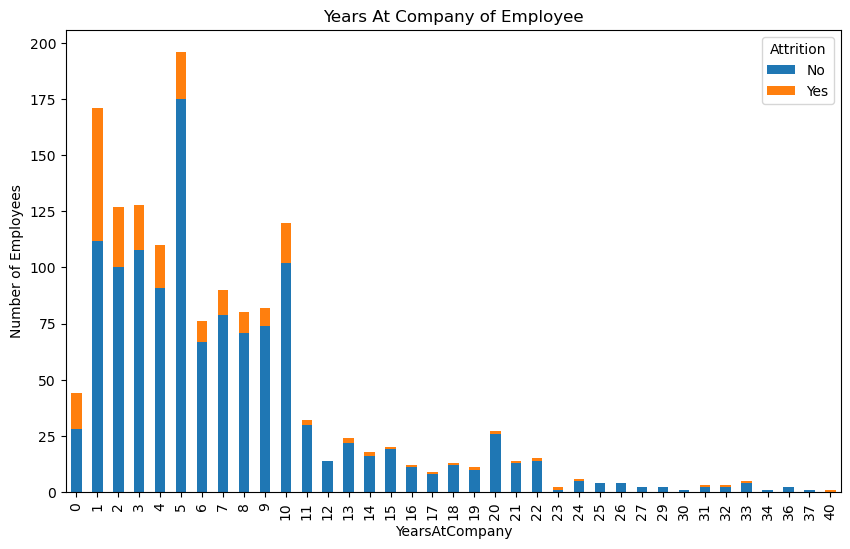

In [48]:
yac = df.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()

yac.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.show()

## <b> INFERENCE : </b>
**It is observed that the newly arriving employees quit their jobs most,so more concern should be given to the freshers and their cause of leaving the company should be figured out.**

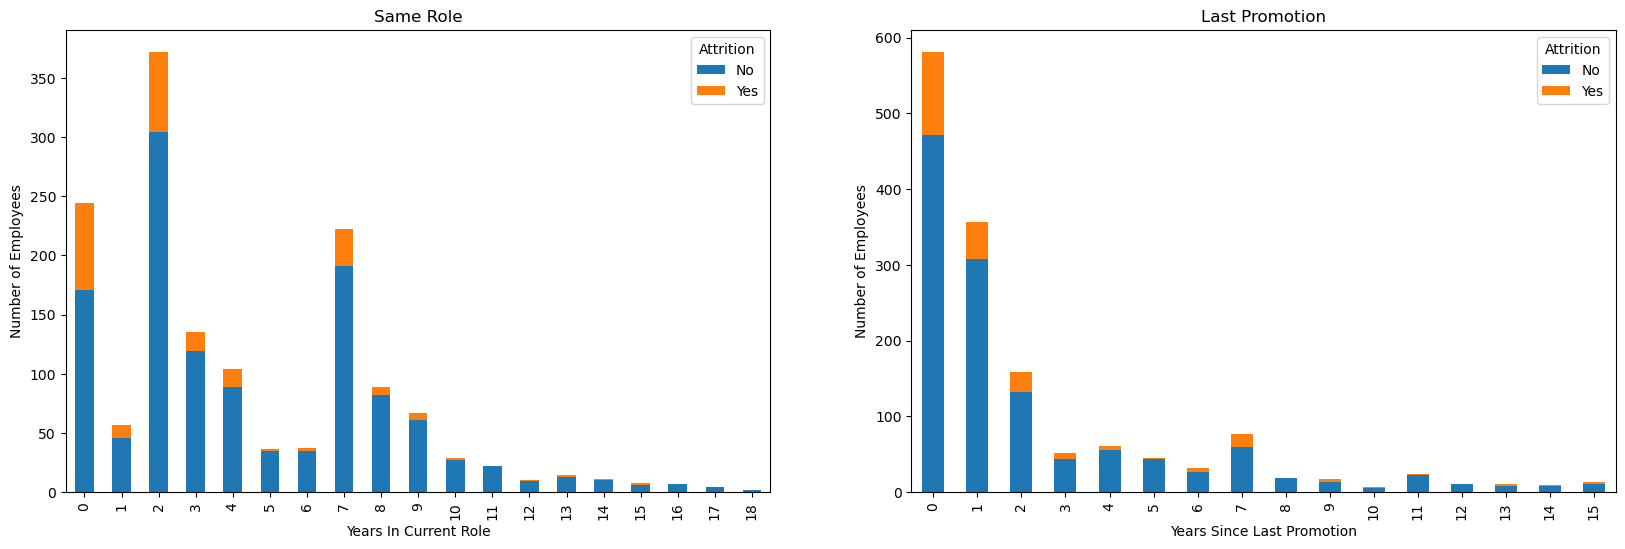

In [49]:
ycr = df.groupby("YearsInCurrentRole")['Attrition'].value_counts(normalize=False).unstack()
ysp = df.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()


fig = plt.figure() # create figure

ax0 = fig.add_subplot(121) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(122) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
ycr.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax0) # add to subplot 1
ax0.set_title('Same Role')
ax0.set_xlabel('Years In Current Role')
ax0.set_ylabel('Number of Employees')

# Subplot 2: Line plot
ysp.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax1) # add to subplot 2
ax1.set_title ('Last Promotion')
ax1.set_ylabel('Number of Employees')
ax1.set_xlabel('Years Since Last Promotion')

plt.show()


## <b> INFERENCE :</b>

**From the above two plots, it is very clear that Employees who are in same post or not getting promoted tend to leave the company most. It is a major concern, since experienced Employees quiting their jobs would affect the company most**

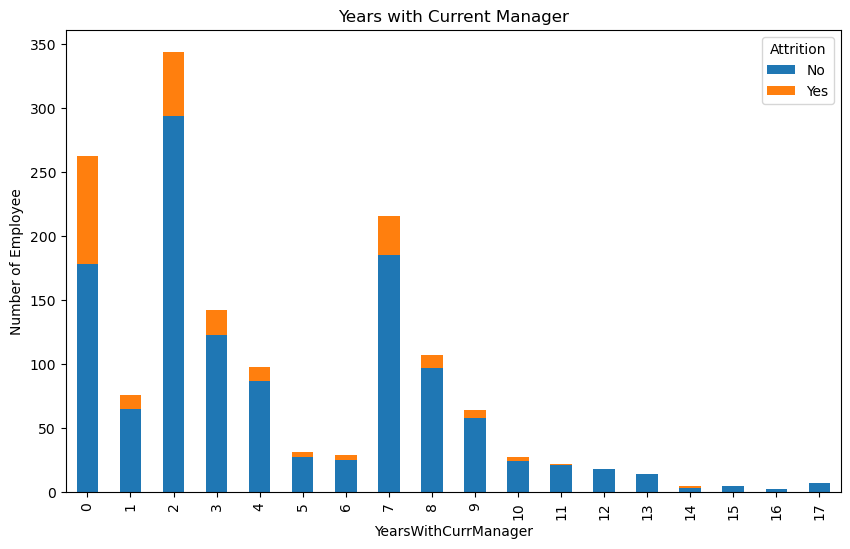

In [50]:
ycm = df.groupby("YearsWithCurrManager")['Attrition'].value_counts(normalize=False).unstack()

ycm.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years with Current Manager')
plt.ylabel('Number of Employee')
plt.show()

## <B> INFERENCE : </b> 
**It is clear that in the starting of relation of Manager and Employee's are not so happy. It is important that the Manager communication with the employee from the starting itself trying to understand them soon to reduce the increase in Attrition**

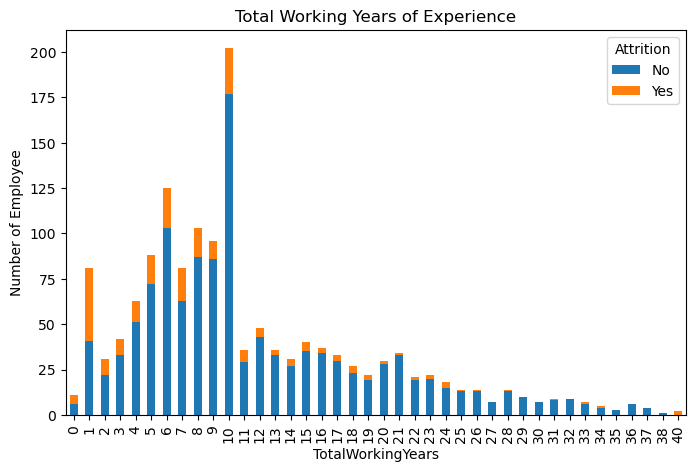

In [51]:
twy = df.groupby("TotalWorkingYears")['Attrition'].value_counts(normalize=False).unstack()

twy.plot(kind='bar', stacked='False',figsize=(8,5))

plt.title('Total Working Years of Experience')
plt.ylabel('Number of Employee')
plt.show()

## <b> INFERENCE :</b>
**It is observed that freshers leave the company very likely so it's important that company creates a new policy to handle freshers so they don't leave the company from the start**

### <b> Analysis of Monthly Income

In [52]:
mi = df[df['Attrition']=='Yes']['MonthlyIncome']
mi = mi.reset_index()
mi.drop(['index'], axis=1, inplace=True)


mn = df[df['Attrition']=='No']['MonthlyIncome']
mn = mn.reset_index()
mn.drop(['index'], axis=1, inplace=True)

mi['mn'] = mn
mi.rename(columns={'MonthlyIncome':'Yes', 'mn':'No'}, inplace=True)
mi.head()


Yes    No
0  5993  5130
1  2090  2909
2  2028  3468
3  3407  3068
4  2960  2670

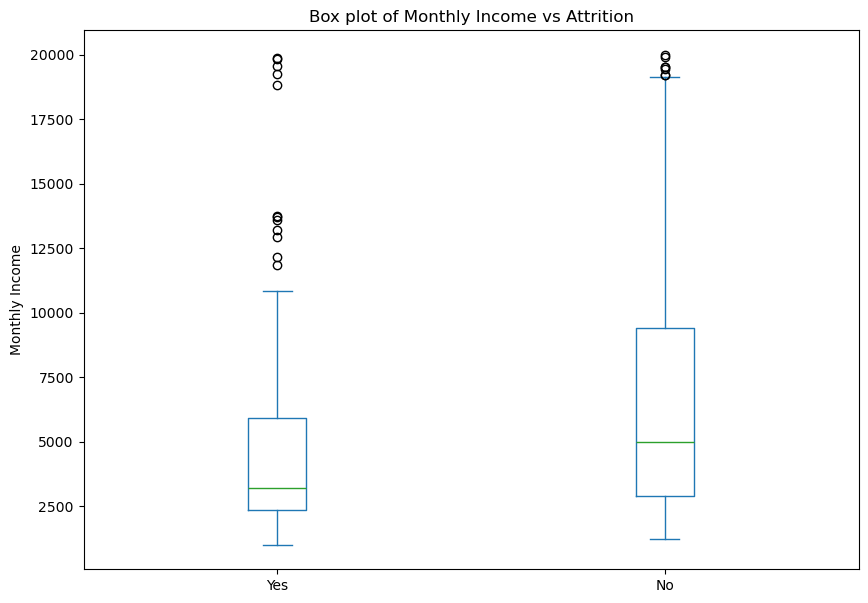

In [53]:
mi.plot(kind='box', figsize=(10, 7))

plt.title('Box plot of Monthly Income vs Attrition')
plt.ylabel('Monthly Income')

plt.show()

# <b> INFERENCE : </b>
**Employees who left their jobs tend to have low average monthly income than those who continued their job in the company** 

## <b> Department Wise Attrition

In [54]:
dept = df.groupby("Department")['Attrition'].value_counts(normalize=False).unstack().T
dept

Department  Human Resources  Research & Development  Sales
Attrition                                                 
No                       51                     828    354
Yes                      12                     133     92

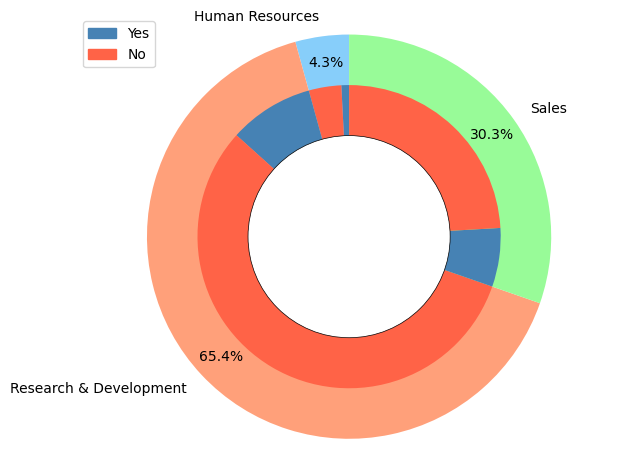

In [55]:
# Data
labels = ['Human Resources', 'Research & Development', 'Sales']
sizes = [63, 961, 446]
labels_attrition = ['Yes', 'No', 'Yes', 'No', 'Yes', 'No']
sizes_attrition = [12, 51, 133, 828, 92, 354]

# Elegant and light colors
colors = ['#87CEFA', '#FFA07A', '#98FB98']  # Light blue, light salmon, light green
colors_attrition = ['#4682B4', '#FF6347', '#4682B4', '#FF6347', '#4682B4', '#FF6347']  # Steel blue and tomato

# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90, frame=True)
plt.pie(sizes_attrition, colors=colors_attrition, radius=0.75, startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white', linewidth=0.5)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Legend
import matplotlib.patches as mpatches
yes_patch = mpatches.Patch(color='#4682B4', label='Yes')
no_patch = mpatches.Patch(color='#FF6347', label='No')
plt.legend(handles=[yes_patch, no_patch], loc='upper left')

plt.axis('equal')
plt.tight_layout()
plt.show()
